In [1]:
import pandas as pd
import json
import numpy as np

In [2]:
file_paths = ['msk.json']

# Словарь для хранения колонок каждого датафрейма
dfs = []

# Чтение и сохранение всех датафреймов
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
    merged_df = pd.json_normalize(json_data)
    dfs.append(merged_df)

# Находим общие колонки для всех датафреймов
common_columns = set.intersection(*[set(df.columns) for df in dfs])

merged_df = pd.concat([df[list(common_columns)] for df in dfs], ignore_index=True)

In [3]:
print("Информация о колонках:")
for column in merged_df.columns:
    unique_count = merged_df[column].apply(lambda x: str(x) if isinstance(x, list) else x).nunique(dropna=False)
    data_type = merged_df[column].dtype
    nan_count = merged_df[column].isna().sum()
    print(f"Колонка '{column}': количество уникальных значений = {unique_count}, тип данных = {data_type}, количество NaN = {nan_count}")

Информация о колонках:
Колонка 'metro_distance': количество уникальных значений = 62, тип данных = object, количество NaN = 26550
Колонка 'ticket_type_id': количество уникальных значений = 3, тип данных = float64, количество NaN = 46753
Колонка 'media.tours': количество уникальных значений = 2, тип данных = float64, количество NaN = 53571
Колонка 'metro_stationtr': количество уникальных значений = 323, тип данных = object, количество NaN = 22307
Колонка 'newcomplex_id': количество уникальных значений = 447, тип данных = float64, количество NaN = 5780
Колонка 'no_previous_occupancy': количество уникальных значений = 3, тип данных = object, количество NaN = 52914
Колонка 'city_id': количество уникальных значений = 352, тип данных = float64, количество NaN = 6755
Колонка 'district_id': количество уникальных значений = 173, тип данных = object, количество NaN = 2428
Колонка 'has_mortgage': количество уникальных значений = 3, тип данных = object, количество NaN = 53021
Колонка 'object_type_

In [4]:
print(merged_df.shape)

(53572, 60)


In [5]:
columns_to_keep = [
    '_object_id',
    'meta.district',
    'floors',
    'wall_id',
    'rooms',
    'type',
    'floor',
    'class',
    'square',
    'lo',
    'la',
    'price'
]

dfs_filtered = [df.loc[:, columns_to_keep] for df in dfs]

In [6]:
dfs_filtered[0].dropna(subset=['meta.district','price', 'floors', 'wall_id', 'square'], inplace=True)

In [7]:
dfs_filtered[0].isna().sum()

_object_id       0
meta.district    0
floors           0
wall_id          0
rooms            0
type             0
floor            0
class            0
square           0
lo               0
la               0
price            0
dtype: int64

In [8]:
dfs_filtered[0].dtypes

_object_id         int64
meta.district     object
floors           float64
wall_id          float64
rooms              int64
type              object
floor              int64
class             object
square           float64
lo                object
la                object
price             object
dtype: object

In [9]:
merged_df = pd.concat([df for df in dfs_filtered], ignore_index=True)

In [10]:
merged_df

,_object_id,meta.district,floors,wall_id,rooms,type,floor,class,square,lo,la,price
0,1027521,Текстильщики,24.0,96.0,2,flat,12,flats,51.0,37.721049,55.721569,18000000
1,1025202,Якиманка,5.0,75.0,4,flat,4,flats,76.0,37.615075,55.744992,57000000
2,1023254,поселение Рязановское,15.0,85.0,1,flat,10,flats,35.1,37.521329,55.500457,8500000
3,1023205,Симферовопольское шоссе,4.0,8.0,1,flat,4,flats,38.8,37.632026,55.55774,7500000
4,1018222,Покровское-Стрешнево,22.0,82.0,2,flat,2,flats,41.0,37.431507,55.818206,18970000
...,...,...,...,...,...,...,...,...,...,...,...,...
50861,462368,поселение Сосенское,18.0,83.0,3,flat,2,newhousesflats,94.9,37.42916,55.591599,20904200
50862,462367,поселение Сосенское,18.0,83.0,2,flat,2,newhousesflats,68.2,37.42916,55.591599,17384520
50863,462366,поселение Сосенское,18.0,83.0,1,flat,2,newhousesflats,48.7,37.42916,55.591599,13422453
50864,462365,поселение Сосенское,18.0,83.0,1,flat,2,newhousesflats,48.2,37.42916,55.591599,13328047


In [11]:
print("Информация о колонках:")
for column in merged_df.columns:
    unique_count = (
        merged_df[column]
        .apply(lambda x: str(x) if isinstance(x, list) else x)
        .nunique(dropna=False)
    )
    data_type = merged_df[column].dtype
    nan_count = merged_df[column].isna().sum()
    print(
        f"Колонка '{column}': количество уникальных значений = {unique_count}, тип данных = {data_type}, количество NaN = {nan_count}"
    )
merged_df.shape

Информация о колонках:
Колонка '_object_id': количество уникальных значений = 50866, тип данных = int64, количество NaN = 0
Колонка 'meta.district': количество уникальных значений = 169, тип данных = object, количество NaN = 0
Колонка 'floors': количество уникальных значений = 71, тип данных = float64, количество NaN = 0
Колонка 'wall_id': количество уникальных значений = 45, тип данных = float64, количество NaN = 0
Колонка 'rooms': количество уникальных значений = 9, тип данных = int64, количество NaN = 0
Колонка 'type': количество уникальных значений = 4, тип данных = object, количество NaN = 0
Колонка 'floor': количество уникальных значений = 70, тип данных = int64, количество NaN = 0
Колонка 'class': количество уникальных значений = 2, тип данных = object, количество NaN = 0
Колонка 'square': количество уникальных значений = 4486, тип данных = float64, количество NaN = 0
Колонка 'lo': количество уникальных значений = 5085, тип данных = object, количество NaN = 0
Колонка 'la': колич

(50866, 12)

In [12]:
district_counts = merged_df['wall_id'].value_counts()

replace_dict = district_counts[district_counts < 10].to_dict()

merged_df['wall_id'] = merged_df['wall_id'].apply(lambda x: 0 if x in replace_dict else x)

In [13]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    """
    Вычисляет расстояние между двумя точками на глобусе по координатам широты и долготы.

    Аргументы:
    lat1 (float): Широта первой точки в градусах.
    lon1 (float): Долгота первой точки в градусах.
    lat2 (float): Широта второй точки в градусах.
    lon2 (float): Долгота второй точки в градусах.

    Возвращает:
    float: Расстояние между двумя точками в километрах.
    """
    # Радиус Земли в километрах
    R = 6371.0

    # Преобразование координат в радианы
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Разница между широтами и долготами
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Формула гаверсинусов
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Расстояние между точками
    distance = R * c

    return distance

def find_nearest_metro(building_lat, building_lon, metro_stations):
    """
    Находит ближайшую станцию метро к заданному зданию.

    Аргументы:
    building_lat (float): Широта здания.
    building_lon (float): Долгота здания.
    metro_stations (list): Список словарей с информацией о станциях метро.

    Возвращает:
    str: Название ближайшей станции метро.
    """
    nearest_metro = None
    min_distance = float('inf')

    for station in metro_stations:
        metro_lat = station['geo_lat']
        metro_lon = station['geo_lon']
        distance = haversine(building_lat, building_lon, metro_lat, metro_lon)
        if distance < min_distance:
            min_distance = distance
            nearest_metro = station['value']

    return nearest_metro, min_distance


merged_df["lo"] = merged_df["lo"].astype(float)
merged_df["la"] = merged_df["la"].astype(float)

from metro_info import centres, msk_metro
merged_df['nearest_metro'], merged_df['dist_to_metro'] = zip(*merged_df.apply(lambda row: find_nearest_metro(row['la'], row['lo'], msk_metro), axis=1))

In [14]:
merged_df

,_object_id,meta.district,floors,wall_id,rooms,type,floor,class,square,lo,la,price,nearest_metro,dist_to_metro
0,1027521,Текстильщики,24.0,96.0,2,flat,12,flats,51.0,37.721049,55.721569,18000000,Нижегородская,1.298239
1,1025202,Якиманка,5.0,75.0,4,flat,4,flats,76.0,37.615075,55.744992,57000000,Кропоткинская,0.718215
2,1023254,поселение Рязановское,15.0,85.0,1,flat,10,flats,35.1,37.521329,55.500457,8500000,Бунинская аллея,4.195058
3,1023205,Симферовопольское шоссе,4.0,8.0,1,flat,4,flats,38.8,37.632026,55.557740,7500000,Аннино,3.562700
4,1018222,Покровское-Стрешнево,22.0,82.0,2,flat,2,flats,41.0,37.431507,55.818206,18970000,Спартак,0.270643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50861,462368,поселение Сосенское,18.0,83.0,3,flat,2,newhousesflats,94.9,37.429160,55.591599,20904200,Прокшино,0.678734
50862,462367,поселение Сосенское,18.0,83.0,2,flat,2,newhousesflats,68.2,37.429160,55.591599,17384520,Прокшино,0.678734
50863,462366,поселение Сосенское,18.0,83.0,1,flat,2,newhousesflats,48.7,37.429160,55.591599,13422453,Прокшино,0.678734
50864,462365,поселение Сосенское,18.0,83.0,1,flat,2,newhousesflats,48.2,37.429160,55.591599,13328047,Прокшино,0.678734


In [15]:
def get_coordinates_by_city(city_name, centres_list):
    """
    Возвращает координаты города по его названию.

    Аргументы:
    city_name (str): Название города.
    centres_list (list): Список словарей с информацией о городах и их координатах.

    Возвращает:
    tuple or None: Кортеж с координатами (geo_lat, geo_lon) или None, если город не найден.
    """
    for centre in centres_list:
        if centre.get('city') == city_name:
            return centre.get('geo_lat'), centre.get('geo_lon')
    return None

la_centre, lo_centre = get_coordinates_by_city("Москва", centres)
merged_df['distance_to_centre'] = merged_df.apply(lambda row: haversine(la_centre, lo_centre, row['la'], row['lo']), axis=1)

In [16]:
merged_df

,_object_id,meta.district,floors,wall_id,rooms,type,floor,class,square,lo,la,price,nearest_metro,dist_to_metro,distance_to_centre
0,1027521,Текстильщики,24.0,96.0,2,flat,12,flats,51.0,37.721049,55.721569,18000000,Нижегородская,1.298239,7.428218
1,1025202,Якиманка,5.0,75.0,4,flat,4,flats,76.0,37.615075,55.744992,57000000,Кропоткинская,0.718215,0.802166
2,1023254,поселение Рязановское,15.0,85.0,1,flat,10,flats,35.1,37.521329,55.500457,8500000,Бунинская аллея,4.195058,28.611327
3,1023205,Симферовопольское шоссе,4.0,8.0,1,flat,4,flats,38.8,37.632026,55.557740,7500000,Аннино,3.562700,21.647505
4,1018222,Покровское-Стрешнево,22.0,82.0,2,flat,2,flats,41.0,37.431507,55.818206,18970000,Спартак,0.270643,13.651241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50861,462368,поселение Сосенское,18.0,83.0,3,flat,2,newhousesflats,94.9,37.429160,55.591599,20904200,Прокшино,0.678734,21.344473
50862,462367,поселение Сосенское,18.0,83.0,2,flat,2,newhousesflats,68.2,37.429160,55.591599,17384520,Прокшино,0.678734,21.344473
50863,462366,поселение Сосенское,18.0,83.0,1,flat,2,newhousesflats,48.7,37.429160,55.591599,13422453,Прокшино,0.678734,21.344473
50864,462365,поселение Сосенское,18.0,83.0,1,flat,2,newhousesflats,48.2,37.429160,55.591599,13328047,Прокшино,0.678734,21.344473


In [17]:
merged_df.isna().sum(), merged_df.dtypes

(_object_id            0
 meta.district         0
 floors                0
 wall_id               0
 rooms                 0
 type                  0
 floor                 0
 class                 0
 square                0
 lo                    0
 la                    0
 price                 0
 nearest_metro         0
 dist_to_metro         0
 distance_to_centre    0
 dtype: int64,
 _object_id              int64
 meta.district          object
 floors                float64
 wall_id               float64
 rooms                   int64
 type                   object
 floor                   int64
 class                  object
 square                float64
 lo                    float64
 la                    float64
 price                  object
 nearest_metro          object
 dist_to_metro         float64
 distance_to_centre    float64
 dtype: object)

In [18]:
merged_df["price"] = merged_df["price"].astype(float)
merged_df["square"] = merged_df["square"].astype(float)
merged_df.drop(['lo', 'la', '_object_id'], axis=1, inplace=True)
merged_df['wall_id'] = merged_df['wall_id'].astype(int)

In [19]:
merged_df.dtypes

meta.district          object
floors                float64
wall_id                 int64
rooms                   int64
type                   object
floor                   int64
class                  object
square                float64
price                 float64
nearest_metro          object
dist_to_metro         float64
distance_to_centre    float64
dtype: object

In [20]:
merged_df['class'].unique()

array(['flats', 'newhousesflats'], dtype=object)

In [21]:
categorical = [
    "meta.district",
    "type",
    'wall_id',
    'nearest_metro',
    'class'
]


In [24]:
merged_df[categorical] = merged_df[categorical].astype('category')

In [25]:
from sklearn.preprocessing import LabelEncoder
non_categorical_columns = merged_df.columns.difference(categorical)
# Создайте объект LabelEncoder
isolation_df = merged_df[non_categorical_columns].copy()
# Примените Label Encoding к каждому категориальному столбцу
for column in categorical:
    label_encoder = LabelEncoder()
    isolation_df[column] = label_encoder.fit_transform(merged_df[column])

In [26]:
isolation_df

,dist_to_metro,distance_to_centre,floor,floors,price,rooms,square,meta.district,type,wall_id,nearest_metro,class
0,1.298239,7.428218,12,24.0,18000000.0,2,51.0,124,1,18,110,0
1,0.718215,0.802166,4,5.0,57000000.0,4,76.0,145,1,10,75,0
2,4.195058,28.611327,10,15.0,8500000.0,1,35.1,163,1,15,29,0
3,3.562700,21.647505,4,4.0,7500000.0,1,38.8,114,1,4,7,0
4,0.270643,13.651241,2,22.0,18970000.0,2,41.0,97,1,12,172,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50861,0.678734,21.344473,2,18.0,20904200.0,3,94.9,164,1,13,145,1
50862,0.678734,21.344473,2,18.0,17384520.0,2,68.2,164,1,13,145,1
50863,0.678734,21.344473,2,18.0,13422453.0,1,48.7,164,1,13,145,1
50864,0.678734,21.344473,2,18.0,13328047.0,1,48.2,164,1,13,145,1


In [27]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(random_state=0)

# Обучение модели
clf.fit(isolation_df)

# Предсказание выбросов
outliers = clf.predict(isolation_df)

filtered_df = merged_df[outliers == 1]

In [28]:
import numpy as np
np.sum(outliers == -1)

6111

In [29]:
filtered_df

,meta.district,floors,wall_id,rooms,type,floor,class,square,price,nearest_metro,dist_to_metro,distance_to_centre
0,Текстильщики,24.0,96,2,flat,12,flats,51.0,18000000.0,Нижегородская,1.298239,7.428218
2,поселение Рязановское,15.0,85,1,flat,10,flats,35.1,8500000.0,Бунинская аллея,4.195058,28.611327
4,Покровское-Стрешнево,22.0,82,2,flat,2,flats,41.0,18970000.0,Спартак,0.270643,13.651241
5,М-4,5.0,92,1,flat,5,flats,32.5,5100000.0,Домодедовская,6.614912,22.726855
7,Можайский,5.0,75,1,flat,4,flats,32.0,11800000.0,Кунцевская,1.434641,12.266167
...,...,...,...,...,...,...,...,...,...,...,...,...
50861,поселение Сосенское,18.0,83,3,flat,2,newhousesflats,94.9,20904200.0,Прокшино,0.678734,21.344473
50862,поселение Сосенское,18.0,83,2,flat,2,newhousesflats,68.2,17384520.0,Прокшино,0.678734,21.344473
50863,поселение Сосенское,18.0,83,1,flat,2,newhousesflats,48.7,13422453.0,Прокшино,0.678734,21.344473
50864,поселение Сосенское,18.0,83,1,flat,2,newhousesflats,48.2,13328047.0,Прокшино,0.678734,21.344473


In [28]:
from scipy.stats import boxcox, yeojohnson
df_transformed_all = filtered_df.copy()

for column in ['floors', 'square', 'dist_to_metro', 'distance_to_centre']:
    df_transformed_all[f'sqrt_{column}'] = np.sqrt(filtered_df[column])

# Возведение в квадрат для всех float признаков
for column in ['floors', 'square', 'dist_to_metro', 'distance_to_centre']:
    df_transformed_all[f'square_{column}'] = np.power(filtered_df[column], 2)

# Обратное значение для всех float признаков
for column in ['floors', 'square', 'dist_to_metro', 'distance_to_centre']:
    df_transformed_all[f'inv_{column}'] = 1 / filtered_df[column]

# Экспоненциальное преобразование для всех float признаков
for column in ['floors', 'square', 'dist_to_metro', 'distance_to_centre']:
    df_transformed_all[f'exp_{column}'] = np.exp(filtered_df[column])

# Степенное преобразование (с произвольным коэффициентом 1.5) для всех float признаков
for column in ['floors', 'square', 'dist_to_metro', 'distance_to_centre']:
    df_transformed_all[f'pow1.5_{column}'] = np.power(filtered_df[column], 1.5)

# Преобразование Бокса-Кокса и Йео-Джонсона для всех float признаков (только для положительных значений)
for column in ['floors', 'square', 'dist_to_metro', 'distance_to_centre']:
    # Преобразование Бокса-Кокса (требует строго положительные значения)
    df_transformed_all[f'boxcox_{column}'], _ = boxcox(filtered_df[column] + 0.0001)  # добавляем малое число для обработки нулей
    
    # Преобразование Йео-Джонсона (работает с нулями и отрицательными значениями)
    df_transformed_all[f'yeojohnson_{column}'], _ = yeojohnson(filtered_df[column])

# Показываем только первые строки для упрощения вывода
df_transformed_all.head()  # Ограничиваем вывод для удобства чтения


,meta.district,floors,wall_id,rooms,type,floor,class,square,price,nearest_metro,...,pow1.5_dist_to_metro,pow1.5_distance_to_centre,boxcox_floors,yeojohnson_floors,boxcox_square,yeojohnson_square,boxcox_dist_to_metro,yeojohnson_dist_to_metro,boxcox_distance_to_centre,yeojohnson_distance_to_centre
0,Текстильщики,24.0,96,2,flat,12,flats,51.0,18000000.0,Нижегородская,...,1.479218,20.245430,4.843500,4.579217,16.237106,15.655933,0.256283,0.598259,4.650562,5.252320
2,поселение Рязановское,15.0,85,1,flat,10,flats,35.1,8500000.0,Бунинская аллея,...,8.592251,153.040717,3.865311,3.747939,12.611868,12.304600,1.296758,0.891022,15.067873,15.541292
4,Покровское-Стрешнево,22.0,82,2,flat,2,flats,41.0,18970000.0,Спартак,...,0.140798,50.438038,4.653674,4.418002,14.020421,13.608039,-1.436308,0.216913,8.098974,8.630479
5,М-4,5.0,92,1,flat,5,flats,32.5,5100000.0,Домодедовская,...,17.013205,108.345033,1.979480,2.170279,11.961785,11.702518,1.656107,0.972662,12.474341,12.961945
7,Можайский,5.0,75,1,flat,4,flats,32.0,11800000.0,Кунцевская,...,1.718362,42.959903,1.979480,2.170279,11.834453,11.584554,0.351845,0.626186,7.373828,7.916422


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Определение списка категориальных столбцов

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df_transformed_all.drop(['price'], axis=1), df_transformed_all['price'], test_size=0.2, random_state=42)

# Создание и обучение модели CatBoostRegressor


In [33]:
filtered_df.dtypes

meta.district         category
floors                 float64
wall_id               category
rooms                    int64
type                  category
floor                    int64
class                 category
square                 float64
price                  float64
nearest_metro         category
dist_to_metro          float64
distance_to_centre     float64
dtype: object

In [30]:
from pipelines import train_pipeline
model = train_pipeline(filtered_df.drop(['price'], axis=1), filtered_df["price"], categories=categorical, model_type="catboost")

You should provide test set for use best model. use_best_model parameter has been switched to false value.


Learning rate set to 0.011482
0:	learn: 13774412.1518374	total: 59.1ms	remaining: 9m 51s
100:	learn: 6928867.5361622	total: 1.14s	remaining: 1m 59s
200:	learn: 4739638.3789175	total: 2.07s	remaining: 1m 44s
300:	learn: 3969597.6260452	total: 2.94s	remaining: 1m 37s
400:	learn: 3632808.1960277	total: 3.92s	remaining: 1m 35s
500:	learn: 3376057.5953664	total: 4.81s	remaining: 1m 33s
600:	learn: 3160092.0975579	total: 5.68s	remaining: 1m 30s
700:	learn: 2990444.4266441	total: 6.54s	remaining: 1m 28s
800:	learn: 2865970.0495774	total: 7.51s	remaining: 1m 27s
900:	learn: 2766894.1165578	total: 8.41s	remaining: 1m 26s
1000:	learn: 2678886.5316217	total: 9.38s	remaining: 1m 25s
1100:	learn: 2604033.3887998	total: 10.4s	remaining: 1m 25s
1200:	learn: 2537556.4539130	total: 11.4s	remaining: 1m 24s
1300:	learn: 2473877.1645302	total: 12.4s	remaining: 1m 23s
1400:	learn: 2412793.0635591	total: 13.3s	remaining: 1m 22s
1500:	learn: 2363675.6574100	total: 14.4s	remaining: 1m 22s
1600:	learn: 2316284

In [31]:
model.save_model('msk.cbm')

In [29]:
import optuna
from optuna.samplers import TPESampler
from catboost import CatBoostRegressor, Pool
from optuna.pruners import MedianPruner
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error
from tqdm.notebook import tqdm
optuna.logging.set_verbosity(optuna.logging.WARNING)


RANDOM_STATE = 42
y = df_transformed_all['price']
X = df_transformed_all.drop(['price'], axis=1)

X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True) 

c:\Users\sup4i\miniconda3\envs\pythonProject\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
categorical = [
    "meta.district",
    "type",
    'wall_id',
    'nearest_metro',
    'class'
]

In [31]:
def objective_catboost(trial):
    kf = KFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

    boosting_type = trial.suggest_categorical('boosting_type', ['Ordered', 'Plain'])

    if boosting_type == 'Ordered':
        bootstrap_type = 'No'
        grow_policy = 'SymmetricTree'
    else:
        bootstrap_type = trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS'])
        grow_policy = trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])

    if bootstrap_type == 'Bernoulli':
        subsample = trial.suggest_float('subsample', 0.1, 1)
    else:
        subsample = None

    trial_params = {
        'n_estimators' : trial.suggest_int('n_estimators', 1000, 3500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10, log=True),
        'rsm': trial.suggest_float('rsm', 0.1, 1.0),
        'border_count': trial.suggest_int('border_count', 1, 255),
        'leaf_estimation_method': trial.suggest_categorical('leaf_estimation_method', ['Newton', 'Gradient']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 10),
        'boosting_type': boosting_type,
        'bootstrap_type': bootstrap_type,
        'grow_policy': grow_policy,
        'use_best_model': True,
        'random_state': RANDOM_STATE
    }

    if bootstrap_type == 'Bayesian':
        trial_params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 1e-2, 100, log=True)

    if bootstrap_type == 'Bernoulli':
        trial_params['subsample'] = subsample

    base_preds = []
    scores, models = [], []
    for train_idx, valid_idx in kf.split(X, y):
        X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        X_val, y_val = X.iloc[valid_idx], y.iloc[valid_idx]
        
        train_dataset = Pool(X_train, y_train, cat_features=categorical)
        val_dataset = Pool(X_val, y_val, cat_features=categorical)

        # Подаем trials для перебора
        model = CatBoostRegressor(**trial_params)
        model.fit(train_dataset,
                  eval_set=val_dataset,
                  verbose=0,
                  early_stopping_rounds=15)

        y_pred = model.predict(val_dataset).reshape(-1)
        scores.append(mean_squared_error(y_pred, y_val)**0.5)
        base_preds.append(y_pred)
        models.append(model)

    result = np.mean(scores) + np.std(scores)
    
    return result

In [32]:
study_cb = optuna.create_study(direction="minimize",
                            sampler=TPESampler(seed=RANDOM_STATE),
                            pruner=MedianPruner())
study_cb.optimize(objective_catboost,
               n_trials=100,
               n_jobs=-1,
               show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
merged_df.dtypes

meta.district          object
floors                float64
wall_id                 int32
rooms                   int64
type                   object
floor                   int64
class                  object
square                float64
price                 float64
nearest_metro          object
dist_to_metro         float64
distance_to_centre    float64
dtype: object

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(model.predict(X_test), y_test)**0.5


2072053.3638337734

In [85]:
import shap
explainer = shap.TreeExplainer(model)

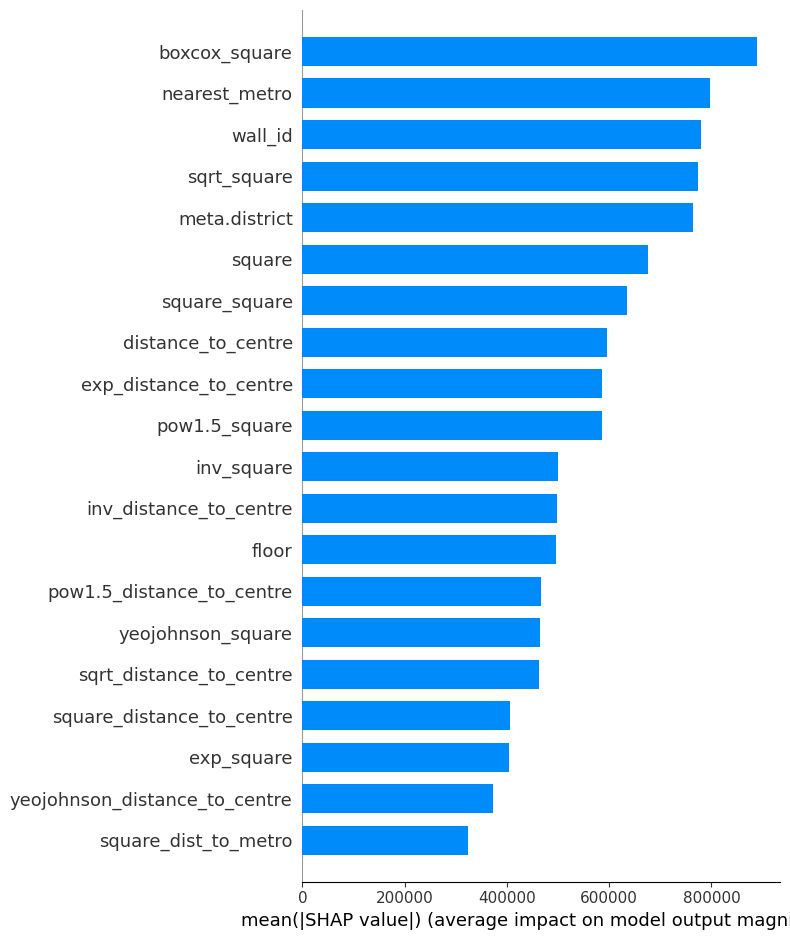

In [86]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

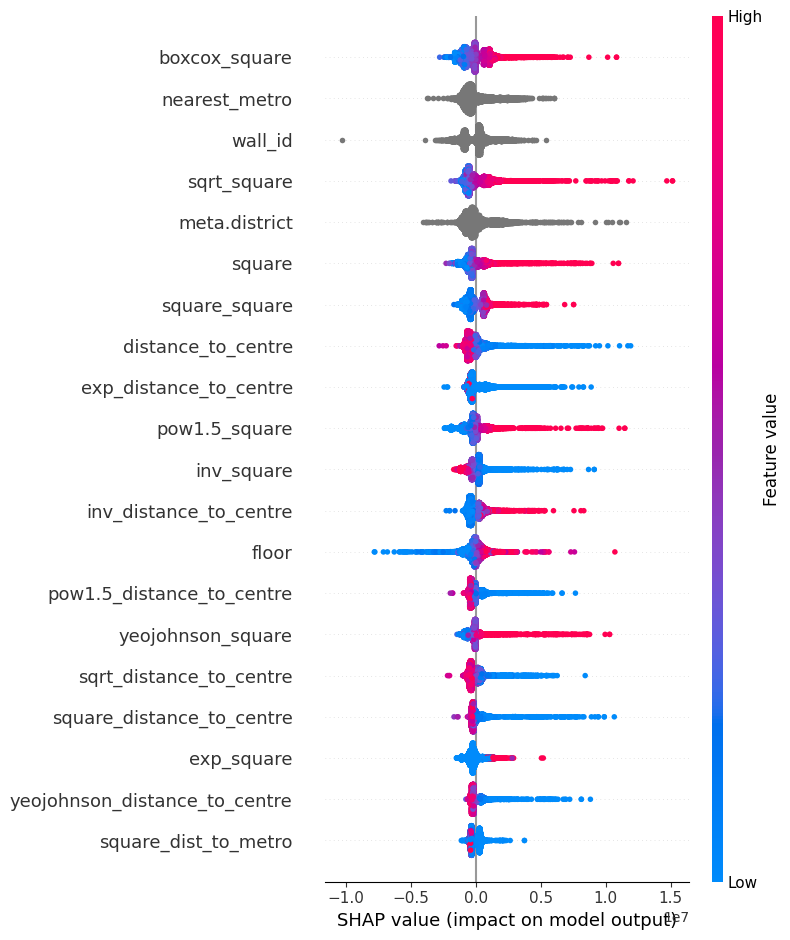

In [87]:
shap.summary_plot(shap_values, X_test, plot_type="dot")

In [91]:
from matplotlib import pyplot as plt
num = 1000
print(y_test.iloc[num])
shap.force_plot(explainer.expected_value, shap_values[num], X_test.iloc[num])

21989193.0
